In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm
from scipy.integrate import quad
import tikzplotlib as tpl
np.random.seed(42)

In [3]:
# Make inline plots vector graphics
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("pdf", "svg")

#matplotlib.rc("font", **{"family": "serif", "serif": ["Times Roman"]})
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsfonts} \usepackage{amsmath}"

# Exponential Bridge

In [4]:
# functions
def exponential_pdf(x, l):
    return(l*np.exp(-l*x))

def exponential_t_log_pdf(x, l):
    return(l*np.exp(-l*np.exp(x) + x))

def exponential_t_sqrt_pdf(x, l):
    return(2*x*l*np.exp(-l*x**2))

"""transforms: log"""

def exponential_t_log_mu(l):
    return(np.log(1/l))

def exponential_t_log_var(l):
    return(1)

def log_normal_back(x, mu, sigma):
    x_ = np.log(x)
    return(norm.pdf(x_, mu, sigma) * 1/x)

"""transforms: sqrt"""

def exponential_t_sqrt_mu(l):
    return(np.sqrt(1/(2*l)))

def exponential_t_sqrt_var(l):
    return(1/(4*l))

def sqrt_normal_back(x, mu, sigma):
    x_ = np.sqrt(x)
    return(norm.pdf(x_, mu, sigma) * 0.5 * 1/np.sqrt(x))


In [5]:
# check integral
from scipy.integrate import quad

y, err = quad(exponential_t_log_pdf, -100, 100, args=(10))
print(y)

1.0


In [6]:
# log bridge

def plot_exponential_t_log(ls, save=False, filename='exponential_log_bridge', show_back=True):
    
    x = np.linspace(0,5,1000+1)
    x_t = np.linspace(-6,4,1000+1)

    l1, l2, l3 = ls 

    ##### original
    y1 = exponential_pdf(x, l1)
    y2 = exponential_pdf(x, l2)
    y3 = exponential_pdf(x, l3)

    ##### transformation

    y1_t_log = exponential_t_log_pdf(x_t, l1)
    y2_t_log = exponential_t_log_pdf(x_t, l2)
    y3_t_log = exponential_t_log_pdf(x_t, l3)

    mu1_t_log = exponential_t_log_mu(l1)
    mu2_t_log = exponential_t_log_mu(l2)
    mu3_t_log = exponential_t_log_mu(l3)

    sigma1_t_log = 1
    sigma2_t_log = 1
    sigma3_t_log = 1

    y1_N_t_log = norm.pdf(x_t, mu1_t_log, sigma1_t_log)
    y2_N_t_log = norm.pdf(x_t, mu2_t_log, sigma2_t_log)
    y3_N_t_log = norm.pdf(x_t, mu3_t_log, sigma3_t_log)

    ##### back transform
    if show_back:
        y1_back = log_normal_back(x, mu1_t_log, sigma1_t_log)
        y2_back = log_normal_back(x, mu2_t_log, sigma2_t_log)
        y3_back = log_normal_back(x, mu3_t_log, sigma3_t_log)

    """Plots"""
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=15)
    plt.rc('axes', labelsize=15)
    
    legend_size=14
    xlabel_size=15
    ylabel_size=15
    title_size=16
    lw=2

    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(10, 3))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
        
    axs[0].plot(x, y1, 'r-', lw=lw)#, label="$\mathcal{E}$");
    axs[0].plot(x, y2, 'b-', lw=lw)#, label="exponential");
    axs[0].plot(x, y3, 'k-', lw=lw, label="$\mathcal{E}$")
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    axs[1].plot(x_t, y1_t_log, 'r-', lw=lw)#, label="$\mathcal{E}$");
    axs[1].plot(x_t, y2_t_log, 'b-', lw=lw)#, label="exponential");
    axs[1].plot(x_t, y3_t_log, 'k-', lw=lw, label="$\mathcal{E}$");
    axs[1].plot(x_t, y1_N_t_log, 'r--', lw=lw)#, label="Laplace approximation");
    axs[1].plot(x_t, y2_N_t_log, 'b--', lw=lw)#, label="LPA of chi2_2");
    axs[1].plot(x_t, y3_N_t_log, 'k--', lw=lw, label="$\mathcal{N}$");
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in log basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw)#, label="exponential");
        axs[2].plot(x, y2, 'b-', lw=lw)#, label="exponential");
        axs[2].plot(x, y3, 'k-', lw=lw, label="$\mathcal{E}$");
        axs[2].plot(x, y1_back, 'r--', lw=lw)#, label="back transform")
        axs[2].plot(x, y2_back, 'b--', lw=lw)#, label="back transform")
        axs[2].plot(x, y3_back, 'k--', lw=lw, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});
    
    plt.tight_layout()

    if save:
        plt.savefig(filename)
        #"""
        tpl.save(
            "exponential_log_bridge.tex",
            #figure = fig,
            axis_width = "\\figwidth",
            axis_height= "\\figheight",
            tex_relative_path_to_data=".",
            override_externals=True,
            float_format=".3g",
            #strict=True
        )
        #"""
        
    plt.show();

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


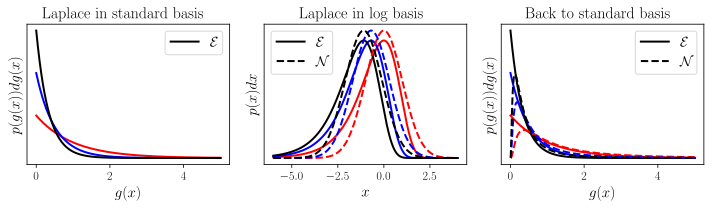

In [7]:
plot_exponential_t_log(ls=[1,2,3], save=True, filename='exponential_log_bridge.pdf', show_back=True)

In [8]:
########## Square basis transform ###########

def plot_exponential_t_sqrt(ls, save=False, filename='exponential_sqrt_bridge', show_back=True, samples=False):

    x = np.linspace(0,5,1000+1)
    x_t = np.linspace(0,3,1000+1)

    l1, l2, l3 = ls
    
    #transform
    if samples:
        from scipy.stats import expon
        exp_samples2 = expon.rvs(scale=1/l2, size=10000)
        exp_samples2_sqrt = np.sqrt(exp_samples2)

    ##### original
    y1 = exponential_pdf(x, l1)
    y2 = exponential_pdf(x, l2)
    y3 = exponential_pdf(x, l3)

    ##### sqrt transformation
    y1_t_sqrt = exponential_t_sqrt_pdf(x_t, l1) 
    y2_t_sqrt = exponential_t_sqrt_pdf(x_t, l2) 
    y3_t_sqrt = exponential_t_sqrt_pdf(x_t, l3)

    mu1_t_sqrt = exponential_t_sqrt_mu(l1)
    mu2_t_sqrt = exponential_t_sqrt_mu(l2)
    mu3_t_sqrt = exponential_t_sqrt_mu(l3)

    sigma1_t_sqrt = np.sqrt(exponential_t_sqrt_var(l1))
    sigma2_t_sqrt = np.sqrt(exponential_t_sqrt_var(l2))
    sigma3_t_sqrt = np.sqrt(exponential_t_sqrt_var(l3))

    y1_N_t_sqrt = norm.pdf(x_t, mu1_t_sqrt, sigma1_t_sqrt) 
    y2_N_t_sqrt = norm.pdf(x_t, mu2_t_sqrt, sigma2_t_sqrt) 
    y3_N_t_sqrt = norm.pdf(x_t, mu3_t_sqrt, sigma3_t_sqrt) 

    ##### back transform
    y1_back = sqrt_normal_back(x, mu1_t_sqrt, sigma1_t_sqrt)
    y2_back = sqrt_normal_back(x, mu2_t_sqrt, sigma2_t_sqrt)
    y3_back = sqrt_normal_back(x, mu3_t_sqrt, sigma3_t_sqrt)

    ##### plots
    """Plots"""
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=15)
    plt.rc('axes', labelsize=15)
    
    legend_size=14
    xlabel_size=15
    ylabel_size=15
    title_size=16
    lw=2

    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(10, 3))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
        
    axs[0].plot(x, y1, 'r-', lw=lw)#, label="$\mathcal{E}$");
    axs[0].plot(x, y2, 'b-', lw=lw)#, label="exponential");
    axs[0].plot(x, y3, 'k-', lw=lw, label="$\mathcal{E}$")
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    axs[1].plot(x_t, y1_t_sqrt, 'r-', lw=lw)#, label="$\mathcal{E}$");
    axs[1].plot(x_t, y2_t_sqrt, 'b-', lw=lw)#, label="exponential");
    if samples:
        axs[1].hist(exp_samples2_sqrt, density=True, alpha=0.5, color='blue', bins=100)
    axs[1].plot(x_t, y3_t_sqrt, 'k-', lw=lw, label="$\mathcal{E}$");
    axs[1].plot(x_t, y1_N_t_sqrt, 'r--', lw=lw)#, label="Laplace approximation");
    axs[1].plot(x_t, y2_N_t_sqrt, 'b--', lw=lw)#, label="LPA of chi2_2");
    axs[1].plot(x_t, y3_N_t_sqrt, 'k--', lw=lw, label="$\mathcal{N}$");
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in sqrt basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw)#, label="exponential");
        axs[2].plot(x, y2, 'b-', lw=lw)#, label="exponential");
        axs[2].plot(x, y3, 'k-', lw=lw, label="$\mathcal{E}$");
        axs[2].plot(x, y1_back, 'r--', lw=lw)#, label="back transform")
        axs[2].plot(x, y2_back, 'b--', lw=lw)#, label="back transform")
        axs[2].plot(x, y3_back, 'k--', lw=lw, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});
    
    plt.tight_layout()

    if save:
        plt.savefig(filename)
        #"""
        tpl.save(
            "exponential_sqrt_bridge.tex",
            figure = fig,
            axis_width = "\\figwidth",
            axis_height= "\\figheight",
            tex_relative_path_to_data=".",
            override_externals=True,
            float_format=".3g",
            #strict=True
        )
        #"""

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide


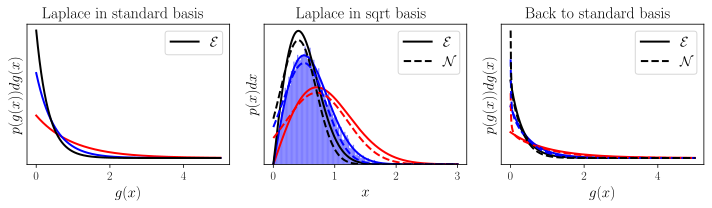

In [9]:
plot_exponential_t_sqrt(ls=[1,2,3], save=True, filename='exponential_sqrt_bridge.pdf', 
                        show_back=True, samples=True)

# Verify the Bridges

In [10]:
# verify the log bridge

def exponential_t_log_lambda(mu):
    return(1/np.exp(mu))
    
test_l1 = 3
test_m1, test_s1 = exponential_t_log_mu(test_l1), np.sqrt(exponential_t_log_var(test_l1))
test_l2 = exponential_t_log_lambda(test_m1)

print(test_l2)

rand_l1 = np.random.random()
rand_m1, rand_s1 = exponential_t_log_mu(rand_l1), np.sqrt(exponential_t_log_var(rand_l1))
rand_l2 = exponential_t_log_lambda(rand_m1)

assert(np.allclose(rand_l1, rand_l2))

3.0


In [11]:
# verify the sqrt bridge

def exponential_t_sqrt_lambda(mu):
    return(1/(2*mu**2))

test_l3 = 3
test_m3, test_s3 = exponential_t_sqrt_mu(test_l3), np.sqrt(exponential_t_sqrt_var(test_l3))
test_l4 = exponential_t_log_lambda(test_m3)

print(test_l2)

rand_l3 = np.random.random()
rand_m3, rand_s3 = exponential_t_sqrt_mu(rand_l3), np.sqrt(exponential_t_sqrt_var(rand_l3))
rand_l4 = exponential_t_sqrt_lambda(rand_m3)

assert(np.allclose(rand_l3, rand_l4))

3.0


# Statistical Distance Measures

In [12]:
# look at MMD
from torch_two_sample import MMDStatistic
from scipy.stats import norm, gamma, expon
import torch

## MMD from 100 different parameters

In [13]:
def MMD_combinations(Ls, plot=False, n_samples=1000, verbose=True):

    MMD_sum = 0
    MMD_t_sqrt_sum = 0
    MMD_t_log_sum = 0 

    for l in Ls:

        if verbose:
            print("l: ", l)

        #get samples from all dists
        #standard
        E_samples = expon.rvs(scale=1/l, size=n_samples)
        #there is no laplace approximation for the standard basis


        #log
        mode1_log = exponential_t_log_mu(l)
        sigma1_log = np.sqrt(exponential_t_log_var(l))
        E_samples_log = np.log(E_samples)
        N_samples_log = norm.rvs(mode1_log, sigma1_log, size=n_samples)

        #sqrt
        mode1_sqrt = exponential_t_sqrt_mu(l)
        sigma1_sqrt = np.sqrt(exponential_t_sqrt_var(l))
        E_samples_sqrt = np.sqrt(E_samples)
        N_samples_sqrt = norm.rvs(mode1_sqrt, sigma1_sqrt, size=n_samples)


        #calculate MMD for all bases
        MMD = MMDStatistic(n_samples, n_samples)

        #standard
        #not given for exponential

        #log
        E_samples_log_ = torch.Tensor(E_samples_log.reshape((n_samples, -1)))
        N_samples_log_ = torch.Tensor(N_samples_log.reshape((n_samples, -1)))
        MMD_log_= MMD(E_samples_log_, N_samples_log_,  alphas=[0.5], ret_matrix=False)

        #sqrt
        E_samples_sqrt_ = torch.Tensor(E_samples_sqrt.reshape((n_samples, -1)))
        N_samples_sqrt_ = torch.Tensor(N_samples_sqrt.reshape((n_samples, -1)))
        MMD_sqrt_ = MMD(E_samples_sqrt_, N_samples_sqrt_,  alphas=[0.5], ret_matrix=False)

        if plot:
            n_bins = int(np.sqrt(n_samples))
            fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(16, 6))
            #axs[0].hist(E_samples, bins = n_bins, alpha=0.5, label='$\mathcal{G}$')
            #axs[0].hist(N_samples, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
            #axs[0].set_title('standard basis')
            #axs[0].legend()

            axs[0].hist(E_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{E}$')
            axs[0].hist(N_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
            axs[0].set_title('log basis')
            axs[0].legend()

            axs[1].hist(E_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{E}$')
            axs[1].hist(N_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
            axs[1].set_title('sqrt basis')
            axs[1].legend()

            plt.show()

        #add them to their respective sums
        MMD_t_log_sum += MMD_log_
        MMD_t_sqrt_sum += MMD_sqrt_
            
    return(MMD_t_log_sum.item(), MMD_t_sqrt_sum.item())

# KL-divergence from samples attempt 2

In [14]:
def KL_div_samples_exp2(l, num_samples, base='standard', plot=False):
    
    exp_samples = expon.rvs(scale=1/l, size=num_samples)
    num_bins = int(np.sqrt(num_samples))
    
    #make sure that base is valid
    assert(base in ['standard', 'log', 'sqrt'])
    
    if base == 'log':
    
        exp_samples_log = np.log(exp_samples)
        mu_exp_log = exponential_t_log_mu(l)
        sigma_exp_log = np.sqrt(exponential_t_log_var(l))
        
        s = np.array(exp_samples_log)
        p_ = exponential_t_log_pdf(s, l)
        q_ = norm.pdf(s, mu_exp_log, sigma_exp_log)
        KL_div_log_ = np.mean(np.log(p_/q_))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, exponential_t_log_pdf(x_, l))
            plt.plot(x_, norm.pdf(x_, mu_exp_log, sigma_exp_log))
            plt.title('log-base')
            plt.show();
            
        return(KL_div_log_)
    
    elif base == 'sqrt':
    
        exp_samples_sqrt = np.sqrt(exp_samples)
        mu_exp_sqrt = exponential_t_sqrt_mu(l)
        sigma_exp_sqrt = np.sqrt(exponential_t_sqrt_var(l))
        
        s = np.array(exp_samples_sqrt)
        p_ = exponential_t_sqrt_pdf(s, l)
        q_ = norm.pdf(s, mu_exp_sqrt, sigma_exp_sqrt)
        KL_div_sqrt_ = np.mean(np.log(p_/q_))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, exponential_t_sqrt_pdf(x_, l))
            plt.plot(x_, norm.pdf(x_, mu_exp_sqrt, sigma_exp_sqrt))
            plt.title('sqrt-base')
            plt.show();
            
        return(KL_div_sqrt_)
        
    elif base == 'standard':
    
        KL_div = np.nan
        
        if plot:
            plt.title("standard")
            plt.hist(exp_samples, density=True, bins=num_bins, alpha=0.5)
            plt.show();

        return(KL_div)

In [15]:
def KL_div_sample_combinations2(params, num_samples, verbose=True, plot=False):
    
    Ls = params[0]
    
    KL_div_sum = 0
    KL_div_t_sqrt_sum = 0
    KL_div_t_log_sum = 0 

    for l in Ls:

        if verbose:
            print("l: ", l)

        #compute KL-div for log and sqrt bases
        KL_div_log_ = KL_div_samples_exp2(l, num_samples, base='log', plot=plot)
        KL_div_sqrt_ = KL_div_samples_exp2(l, num_samples, base='sqrt', plot=plot)

        #calculate the KL divergences for standard base
        KL_div_ = KL_div_samples_exp2(l, num_samples, base='standard', plot=plot)

        #add them to their respective sums
        KL_div_sum += KL_div_
        KL_div_t_log_sum += KL_div_log_
        KL_div_t_sqrt_sum += KL_div_sqrt_

        if verbose:
            print("standard: ", KL_div_, "log: ", KL_div_log_, "sqrt: ", KL_div_sqrt_)
            
            
    return(KL_div_sum, KL_div_t_log_sum, KL_div_t_sqrt_sum)

In [16]:
print(KL_div_sample_combinations2(params=[range(1, 12)], plot=False, verbose=True, num_samples=10000))

l:  1
standard:  nan log:  0.3167863505078108 sqrt:  0.1239660368914856
l:  2
standard:  nan log:  0.3357137651715318 sqrt:  0.12327637137907604
l:  3
standard:  nan log:  0.32658233166361844 sqrt:  0.12347508634875726
l:  4
standard:  nan log:  0.33576203502849905 sqrt:  0.12404994343674862
l:  5
standard:  nan log:  0.3086107409352773 sqrt:  0.13312248125977194
l:  6
standard:  nan log:  0.32319529189357815 sqrt:  0.12151716174977598
l:  7
standard:  nan log:  0.3040089596600337 sqrt:  0.11742421835342712
l:  8
standard:  nan log:  0.31088662812376605 sqrt:  0.12387661821743406
l:  9
standard:  nan log:  0.32427622118461596 sqrt:  0.1236864406548406
l:  10
standard:  nan log:  0.3328776647798636 sqrt:  0.11977839891950377
l:  11
standard:  nan log:  0.3555768636559266 sqrt:  0.12785693138258858
(nan, 3.574276852604521, 1.3620296885934096)


# calculate KL div for increasing lambdas

In [17]:
Ls = np.arange(1, 11)

In [18]:
KL_results_linear = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    
    results_seed = []
    for l_ in Ls:
        KL_ = KL_div_sample_combinations2([[l_]], num_samples=10000)
        results_seed.append(KL_)
        
    KL_results_linear.append(results_seed)

    

seed:  0
l:  1
standard:  nan log:  0.36456448066233904 sqrt:  0.12093719631546808
l:  2
standard:  nan log:  0.3009458901062782 sqrt:  0.12121887690790577
l:  3
standard:  nan log:  0.32330421193988784 sqrt:  0.130028830941657
l:  4
standard:  nan log:  0.3109108882260124 sqrt:  0.12516979796971506
l:  5
standard:  nan log:  0.3358267916034086 sqrt:  0.12729960270993515
l:  6
standard:  nan log:  0.318634103119048 sqrt:  0.1251266727659778
l:  7
standard:  nan log:  0.3286501181408854 sqrt:  0.12720641855894288
l:  8
standard:  nan log:  0.34385913770356197 sqrt:  0.12379014347938117
l:  9
standard:  nan log:  0.34284966682974144 sqrt:  0.11798042062703662
l:  10
standard:  nan log:  0.32156099461542714 sqrt:  0.1214405637353961
seed:  1
l:  1
standard:  nan log:  0.3357899012205915 sqrt:  0.12093968201497104
l:  2
standard:  nan log:  0.3313237994891251 sqrt:  0.120924041972491
l:  3
standard:  nan log:  0.33839296660519647 sqrt:  0.12219751621688135
l:  4
standard:  nan log:  0.3132

In [19]:
# handle the data
KL_results_linear = np.array(KL_results_linear)

# take the mean over the 10 seeds
KL_results_linear_mean = KL_results_linear.mean(0)
print(np.shape(KL_results_linear_mean))
print(KL_results_linear_mean)

(10, 3)
[[       nan 0.33168222 0.1232021 ]
 [       nan 0.32657825 0.12224006]
 [       nan 0.32453388 0.12477948]
 [       nan 0.32051862 0.12532865]
 [       nan 0.33098069 0.12347966]
 [       nan 0.32818156 0.12210397]
 [       nan 0.32749312 0.1234657 ]
 [       nan 0.33256814 0.12496747]
 [       nan 0.32574227 0.12277455]
 [       nan 0.32884742 0.12462792]]


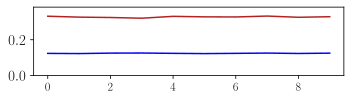

In [26]:
# make plots

fig = plt.figure(figsize=(5, 1.5))
plt.plot(KL_results_linear_mean[:,1], label='log base', color='firebrick')
plt.plot(KL_results_linear_mean[:,2], label='sqrt base', color='blue')
plt.ylim(0, np.nanmax(KL_results_linear_mean)+0.05)
plt.tight_layout()
#"""
tpl.save(
    "KL_Exponential.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=False,
    float_format=".3g"
)
#"""

plt.savefig('KL_exponential.pdf')

plt.show();

# calculate MMD for increasing lambdas

In [21]:
MMD_results_linear = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    
    results_seed = []
    for l_ in Ls:
        MMD_ = MMD_combinations(Ls = [l_])
        results_seed.append(MMD_)
        
    MMD_results_linear.append(results_seed)


seed:  0
l:  1
l:  2
l:  3
l:  4
l:  5
l:  6
l:  7
l:  8
l:  9
l:  10
seed:  1
l:  1
l:  2
l:  3
l:  4
l:  5
l:  6
l:  7
l:  8
l:  9
l:  10
seed:  2
l:  1
l:  2
l:  3
l:  4
l:  5
l:  6
l:  7
l:  8
l:  9
l:  10
seed:  3
l:  1
l:  2
l:  3
l:  4
l:  5
l:  6
l:  7
l:  8
l:  9
l:  10
seed:  4
l:  1
l:  2
l:  3
l:  4
l:  5
l:  6
l:  7
l:  8
l:  9
l:  10
seed:  5
l:  1
l:  2
l:  3
l:  4
l:  5
l:  6
l:  7
l:  8
l:  9
l:  10
seed:  6
l:  1
l:  2
l:  3
l:  4
l:  5
l:  6
l:  7
l:  8
l:  9
l:  10
seed:  7
l:  1
l:  2
l:  3
l:  4
l:  5
l:  6
l:  7
l:  8
l:  9
l:  10
seed:  8
l:  1
l:  2
l:  3
l:  4
l:  5
l:  6
l:  7
l:  8
l:  9
l:  10
seed:  9
l:  1
l:  2
l:  3
l:  4
l:  5
l:  6
l:  7
l:  8
l:  9
l:  10


In [22]:
# handle the data
MMD_results_linear = np.array(MMD_results_linear)

# take the mean over the 10 seeds
MMD_results_linear_mean = MMD_results_linear.mean(0)
print(np.shape(MMD_results_linear_mean))

(10, 2)


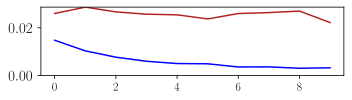

In [24]:
# make plots

fig = plt.figure(figsize=(5, 1.5))
plt.plot(MMD_results_linear_mean[:,0], label='log base', color='firebrick')
plt.plot(MMD_results_linear_mean[:,1], label='sqrt base', color='blue')
plt.ylim(0, np.nanmax(MMD_results_linear_mean))
plt.tight_layout()

#"""
tpl.save(
    "MMD_Exponential.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=False,
    float_format=".3g"
)
#"""
plt.savefig('MMD_exponential.pdf')

plt.show();